In [1]:
!pip install gdal
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 81.2 MB/s eta 0:00:00


***TIFF FILE***

In [16]:
!pip install spectral

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.0/249.0 kB 5.0 MB/s eta 0:00:00


In [17]:
import tifffile as tiff
import matplotlib.pyplot as plt
from spectral import imshow

In [3]:
img = tiff.imread('/content/L71221071_07120010720_DN.tif')

In [9]:
print(img.shape)

(1233, 1520, 6)


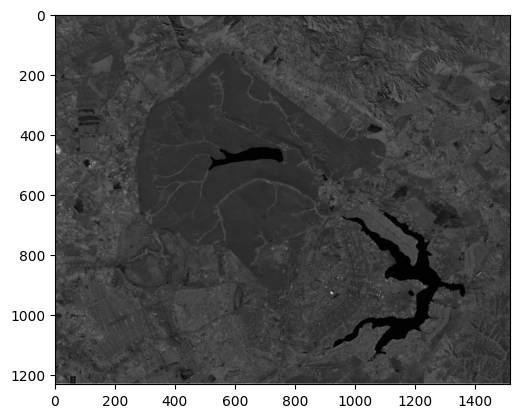

In [15]:
plt.imshow(img[:,:,3], cmap='gray')

ImageView object:
  Display bands       :  (2, 3, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(4.0), np.float64(255.0)]
    G: [np.float64(12.0), np.float64(255.0)]
    B: [np.float64(40.0), np.float64(255.0)]

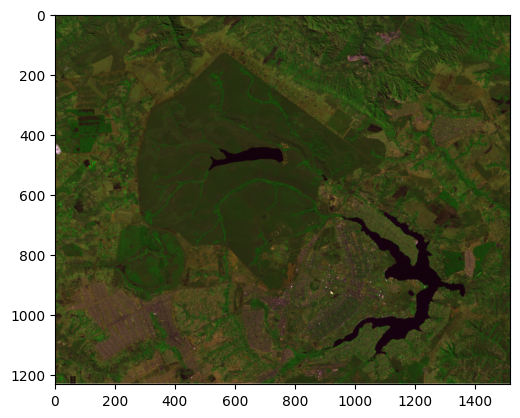

In [20]:
imshow(img, bands=(2,3,0))

GDAL

In [43]:
from osgeo import gdal
import numpy as np

In [22]:
img2 = gdal.Open('/content/L71221071_07120010720_DN.tif')

In [24]:
img3 = img2.ReadAsArray()

In [26]:
img3.shape

(6, 1233, 1520)

In [33]:
img3 = img3.swapaxes(0,1)

In [34]:
img3.shape

(1233, 1520, 6)

ImageView object:
  Display bands       :  (2, 3, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(4.0), np.float64(255.0)]
    G: [np.float64(12.0), np.float64(255.0)]
    B: [np.float64(13.0), np.float64(255.0)]

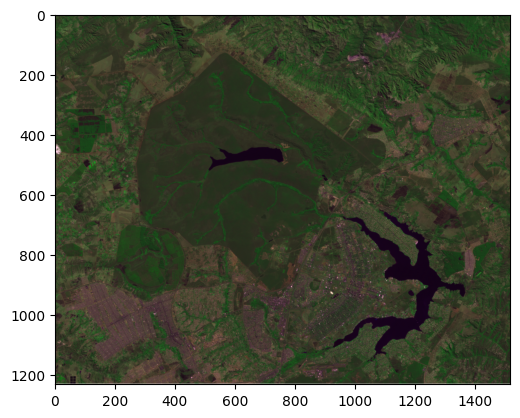

In [37]:
imshow(img3, (2,3,1))

In [41]:
b1 = img2.GetRasterBand(1).ReadAsArray()
b2 = img2.GetRasterBand(2).ReadAsArray()
b4 = img2.GetRasterBand(4).ReadAsArray()

In [45]:
stack = np.dstack([b1,b2,b4])

In [46]:
stack.shape

(1233, 1520, 3)

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(13.0), np.float64(255.0)]
    G: [np.float64(12.0), np.float64(255.0)]
    B: [np.float64(40.0), np.float64(255.0)]

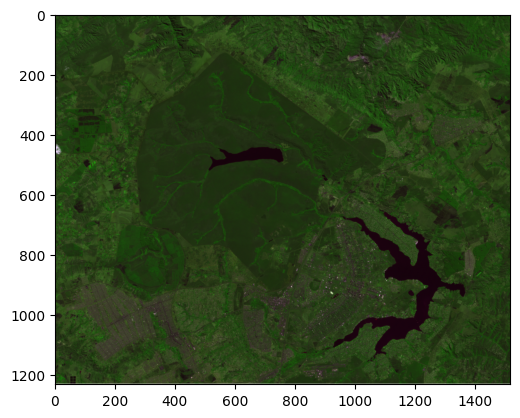

In [47]:
imshow(stack, (1,2,0))

In [52]:
import rasterio
from rasterio.plot import show

Rasterio

In [49]:
rst = rasterio.open('/content/L71221071_07120010720_DN.tif')

In [50]:
print(rst)

<open DatasetReader name='/content/L71221071_07120010720_DN.tif' mode='r'>


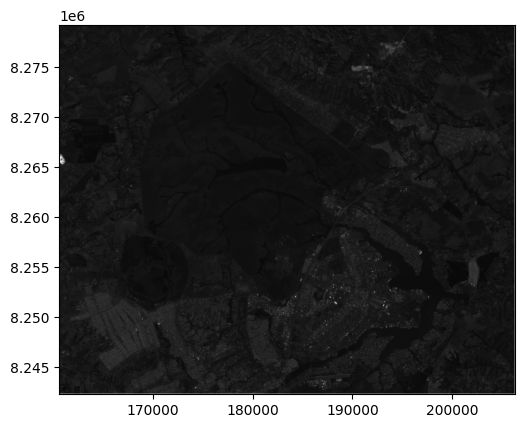

<Axes: >

In [53]:
show(rst, cmap = 'gray')

In [54]:
b1 = rst.read(1)
b2 = rst.read(2)
b4 = rst.read(4)

In [64]:
stack = np.dstack([b1,b2,b4])

In [67]:
with rasterio.open('/content/L71221071_07120010720_DN.tif') as rst:
    b1 = rst.read(1)
    b2 = rst.read(2)
    b4 = rst.read(4)

stack2 = np.dstack([b1,b2,b4])

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(13.0), np.float64(255.0)]
    G: [np.float64(12.0), np.float64(255.0)]
    B: [np.float64(40.0), np.float64(255.0)]

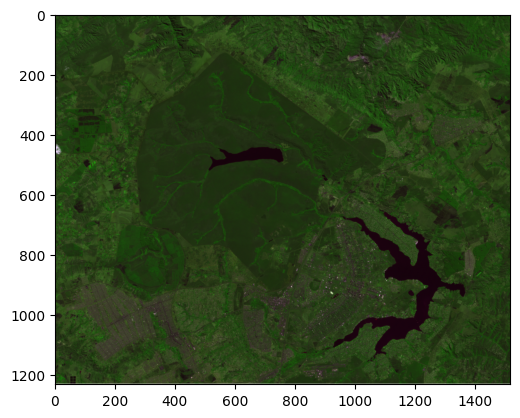

In [70]:
imshow(stack2, (1,2,0))